# <center>Bibliotecas utilizadas</center>

In [1]:
from efficient_kan import KAN

import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import *
from torch.utils.data import DataLoader

# <center>Pré-processamento dos dados</center>

In [2]:
train_path = 'Dataset/train'
test_path = 'Dataset/test'

In [3]:
transform_train = transforms.Compose(
    [transforms.Resize(size = (164,164)),
     transforms.RandomRotation(degrees=15),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

transform_test = transforms.Compose(
    [transforms.Resize(size = (164,164)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform = transform_train)
test_dataset = datasets.ImageFolder(test_path, transform = transform_test)

In [5]:
trainloader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 90, shuffle = True)

# <center>Implementação da arquitetura *efficientKAN*</center>

In [6]:
model = KAN([164*164*3, 164, 64, 3])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

KAN(
  (layers): ModuleList(
    (0-2): 3 x KANLinear(
      (base_activation): ReLU()
    )
  )
)

In [7]:
num_epoch = 250
learning_rate = 0.001

In [8]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [9]:
train_losses = []
train_acc = []
correct = 0
total = 0

training_start_time = time.time()

for epoch in range(num_epoch):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.view(-1, 164*164*3).to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    _, predicted = torch.max(outputs.data, 1)

    acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
    train_acc.append(acc)

    print(f"Época {epoch + 1}/{num_epoch} - Perda no treinamento: {train_loss:.6f} - Acurácia: {acc:.4f}")

training_time = time.time() - training_start_time
print(f"\nTempo total de treinamento: {training_time:.2f} segundos")

Época 1/250 - Perda no treinamento: 2.219940 - Acurácia: 0.5667
Época 2/250 - Perda no treinamento: 0.911306 - Acurácia: 0.6667
Época 3/250 - Perda no treinamento: 0.507108 - Acurácia: 0.7667
Época 4/250 - Perda no treinamento: 0.448474 - Acurácia: 0.9333
Época 5/250 - Perda no treinamento: 0.251564 - Acurácia: 0.9667
Época 6/250 - Perda no treinamento: 0.212713 - Acurácia: 0.8667
Época 7/250 - Perda no treinamento: 0.250224 - Acurácia: 0.9000
Época 8/250 - Perda no treinamento: 0.245125 - Acurácia: 0.8667
Época 9/250 - Perda no treinamento: 0.158514 - Acurácia: 0.9000
Época 10/250 - Perda no treinamento: 0.133146 - Acurácia: 0.9667
Época 11/250 - Perda no treinamento: 0.113397 - Acurácia: 1.0000
Época 12/250 - Perda no treinamento: 0.111548 - Acurácia: 1.0000
Época 13/250 - Perda no treinamento: 0.097030 - Acurácia: 0.9333
Época 14/250 - Perda no treinamento: 0.084306 - Acurácia: 0.9667
Época 15/250 - Perda no treinamento: 0.086034 - Acurácia: 0.9667
Época 16/250 - Perda no treinament

Text(0.5, 0.98, 'Treinamento')

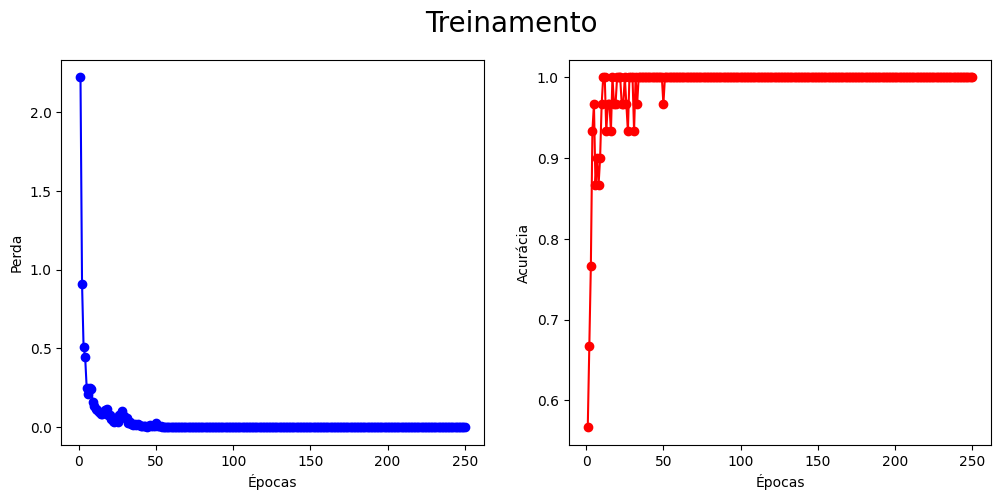

In [10]:
epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'ro-')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.suptitle("Treinamento", fontsize = 20)

In [11]:
model.eval()
    
with torch.no_grad():
        
    for images, labels in testloader:
        images = images.view(-1, 164*164*3).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
        
print(f"Acurácia: {acc:.2f}")

Acurácia: 0.93


# <center>Métricas de avaliação</center>

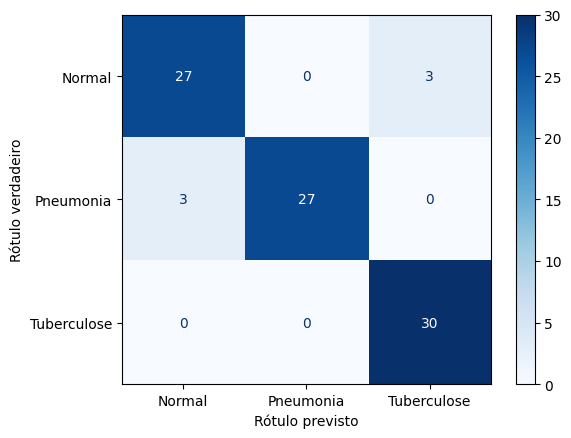

In [12]:
cm = confusion_matrix(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculose'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

In [13]:
print(classification_report(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), target_names=['Normal', 'Pneumonia', 'Tuberculose']))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        30
   Pneumonia       1.00      0.90      0.95        30
 Tuberculose       0.91      1.00      0.95        30

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



In [14]:
precision = precision_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"Precisão: {precision * 100 :.2f}%")

Precisão: 93.64%


In [15]:
recall = recall_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"Recall: {recall * 100 :.2f}%")

Recall: 93.33%


In [16]:
f1 = f1_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"F1 Score: {f1 * 100 :.2f}%")

F1 Score: 93.32%
